## IMPORT THE NECESSARY LIBRARIES

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


## LOAD THE DATA

In [47]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\PRCP-1028-Skin-Disorder-Prediction-20220512T101734Z-001 (2)\\PRCP-1028-Skin-Disorder-Prediction\\dataset_35_dermatology (1).csv")

* GOAL OF THIS PROJECT:


   *     Task 1:-  Prepare a complete data analysis report on the given data.
   

   *     Task 2:-  Create a predictive model  using machine learning techniques to predict the various classes of skin disease. 
   

   *     Task3:-   Suggestions to the Doctors to identify the skin diseases of the patient at the earliest.
   
This dataset contains 34 attributes, 33 of which are linear valued and one of them is nominal.The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. 


* TARGET COLUMN:   It is categorical column showing integer values in range 1-6 representing the disease names

    1. -----         Psoriasis
    2. -----         Seborrheic Dermatitis
    3. -----         Lichen Planus
    4. -----         Pityriasis Rosea
    5. -----         Chronic Dermatitis
    6. -----         Pityriasis Rubra Pilaris



## BASIC CHECKS

In [48]:
df.head(10)   #first 10 rows

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30,4


In [83]:
df.tail(10)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
259,2,2,2,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22.0,4
261,2,2,2,1,0,0,0,0,0,0,...,0,0,1,0,0,0,2,0,36.0,4
277,2,2,2,1,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,25.0,2
279,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,50.0,4
281,2,2,1,0,0,0,0,0,0,0,...,0,0,2,0,0,0,2,0,27.0,4
286,2,3,2,1,0,0,0,0,0,0,...,0,0,3,0,0,0,3,0,45.0,2
303,2,1,2,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,34.0,4
308,2,1,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,12.0,4
345,2,2,2,1,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,35.0,4
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4


In [49]:
# Shape of dataset
df.shape

(366, 35)

In [84]:
#columns
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

## EXAMINE THE DATA

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

## STATISTICAL SUMMARY OF DATA

In [51]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


## CATEGORIES OF EACH COLUMN

In [53]:
df.nunique()

erythema                                     4
scaling                                      4
definite_borders                             4
itching                                      4
koebner_phenomenon                           4
polygonal_papules                            4
follicular_papules                           4
oral_mucosal_involvement                     4
knee_and_elbow_involvement                   4
scalp_involvement                            4
family_history                               2
melanin_incontinence                         4
eosinophils_in_the_infiltrate                3
PNL_infiltrate                               4
fibrosis_of_the_papillary_dermis             4
exocytosis                                   4
acanthosis                                   4
hyperkeratosis                               4
parakeratosis                                4
clubbing_of_the_rete_ridges                  4
elongation_of_the_rete_ridges                4
thinning_of_t

## CHECKING NULL VALUES

In [54]:
df.isnull().sum().sum()

0

We have observed that there are no null values in dataset

## EXPLORATORY DATA ANALYSIS (EDA)

## Target variable distribution
The target column (Class) is categorical but is represented by integers 1 to 6, corresponding to six skin disease types
 * 1 -----         Psoriasis
 * 2 -----         Seborrheic Dermatitis
 * 3 -----         Lichen Planus
 * 4 -----         Pityriasis Rosea
 * 5 -----         Chronic Dermatitis
 * 6 -----         Pityriasis Rubra Pilaris

In [56]:
# Target variable counts
class_distribution = df['class'].value_counts()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64


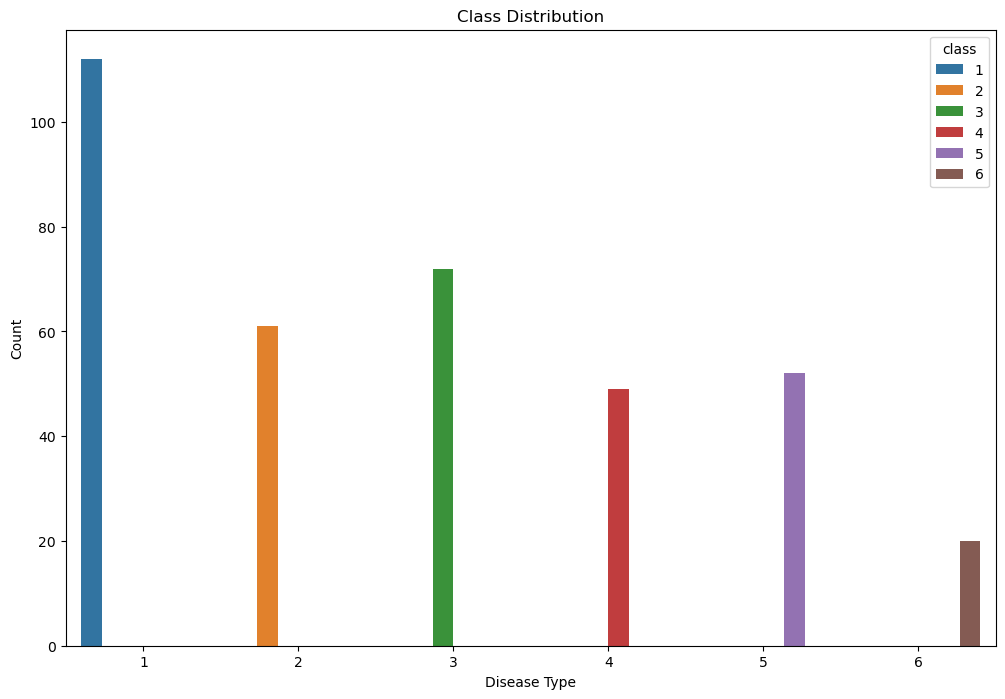

In [57]:
plt.figure(figsize=(12, 8))
sns.countplot(x='class', data=df, hue='class')
plt.title('Class Distribution')
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.show()

* We have observed that Psoriasis disease patients are more than remaining diseases, and data is imabalanced

* We have Age column with some Special character values instead of numeric so we have to convert them to numeric

In [58]:
df.loc[df['Age']=='?'] 

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


*     Age column contains non-numeric values like strings ('unknown','?' 'N/A', etc.),
     pd.to_numeric() will convert those to NaN instead of crashing the code.

In [59]:
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')   # convert those to NaN
df.loc[df['Age']=='?'] 

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class


In [60]:
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

* Now age column have 8 null values which are '?' values previously
*  so we have to fill them with mean

In [61]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

* Now there are no null values in any columns

## CHECKING CORRELATION

<Axes: >

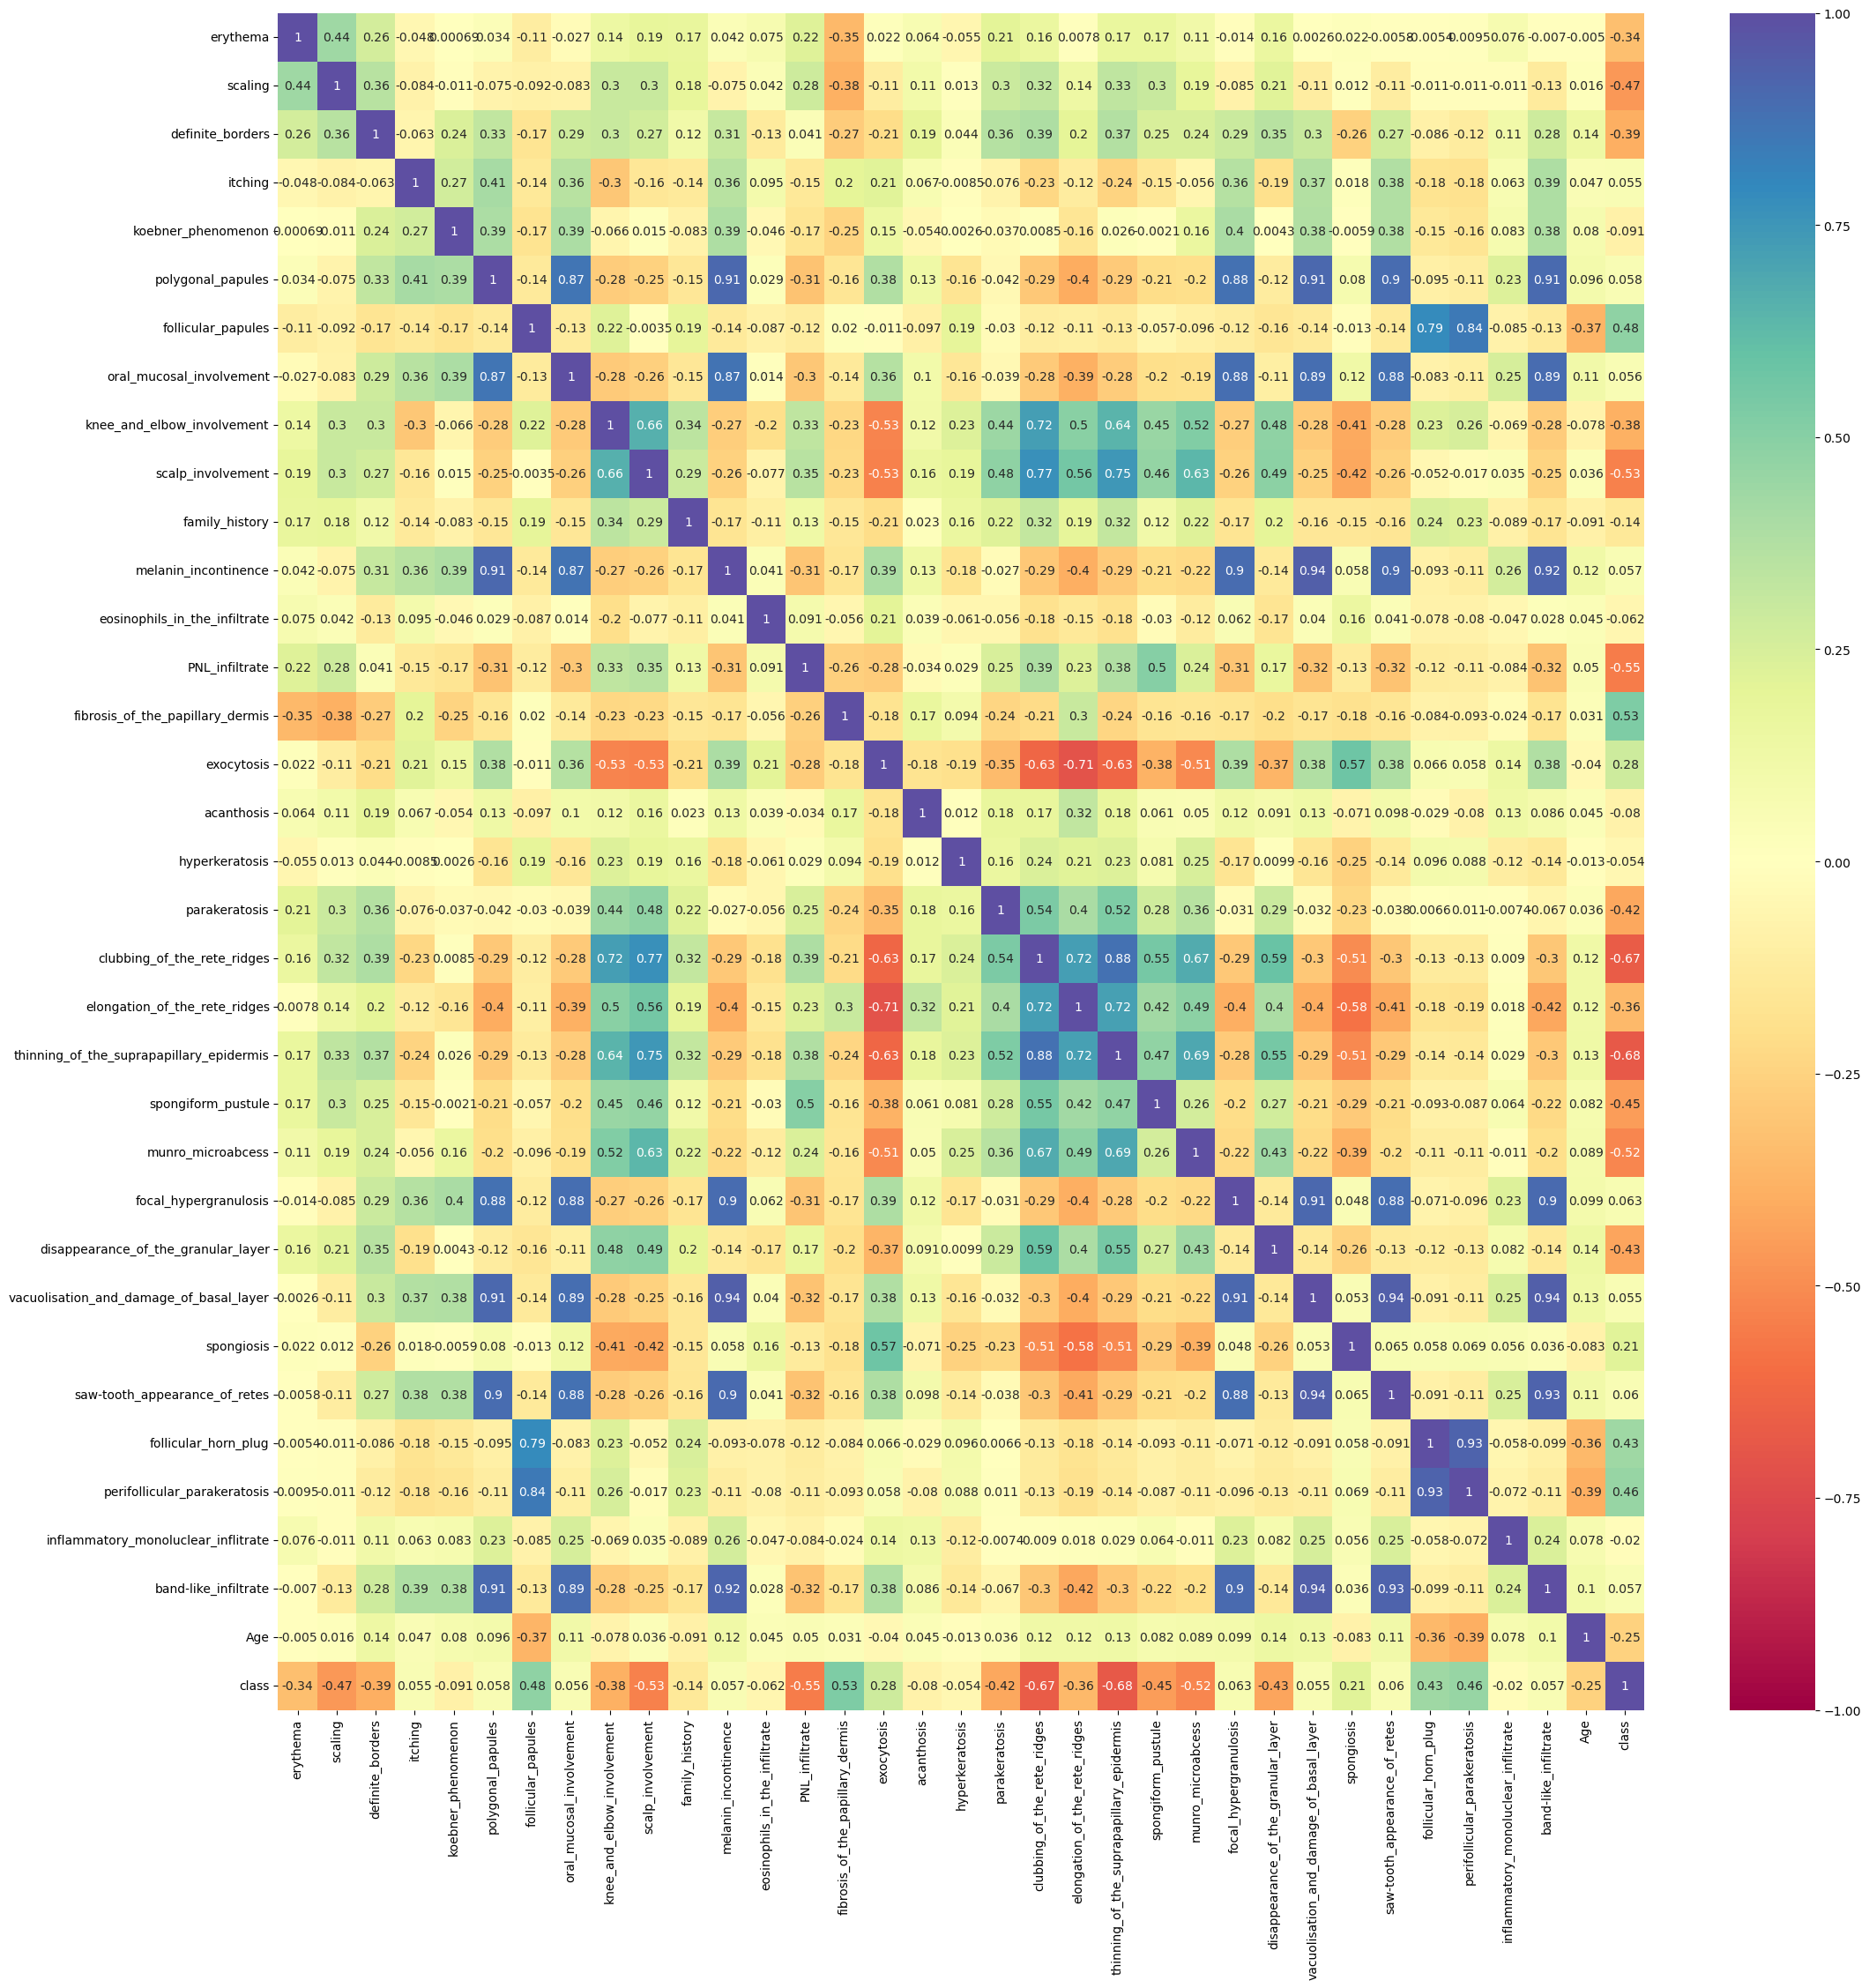

In [62]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), vmin=-1, cmap="Spectral", annot=True)

* Spongiosis and Saw-tooth_appearance_of_retes are highly correlated suggests that these characteristics often co-occur in patients with specific skin disorders.


* Munro_microabscess and Spongiform_pustule shows a positive Correlation.


* Family_history and Scalp_involvement positive correlation between these two features, suggesting that individuals with a family history of skin disorders may have a higher likelihood of scalp involvement.

 Erythema, Scaling, Itching, and Koebner_phenomenon with the class feature:

These features exhibit a negative correlation with the target class variable. This indicates that higher values for these features might reduce the likelihood of certain classes of skin disorders.

Age shows a minor positive correlation with features such as Spongiform_pustule and Scalp_involvement, indicating that these symptoms may be more prevalent in older patients.

## Scaling the data

<h5> INDEPENDENT AND DEPENDENT VARAIABLE CREATION

In [63]:
# Splitt the data 
# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

In [64]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


## Balancing the data

In [65]:
#splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize SMOTE for multi-class classification
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to balance the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verify the class distribution after balancing
print("Class distribution after SMOTE (training set):")
print(y_train_res.value_counts())

Class distribution after SMOTE (training set):
class
5    81
2    81
1    81
4    81
3    81
6    81
Name: count, dtype: int64


# DATA PREPROCESSING

## CHECKING DISTRIBUTION OF DATA


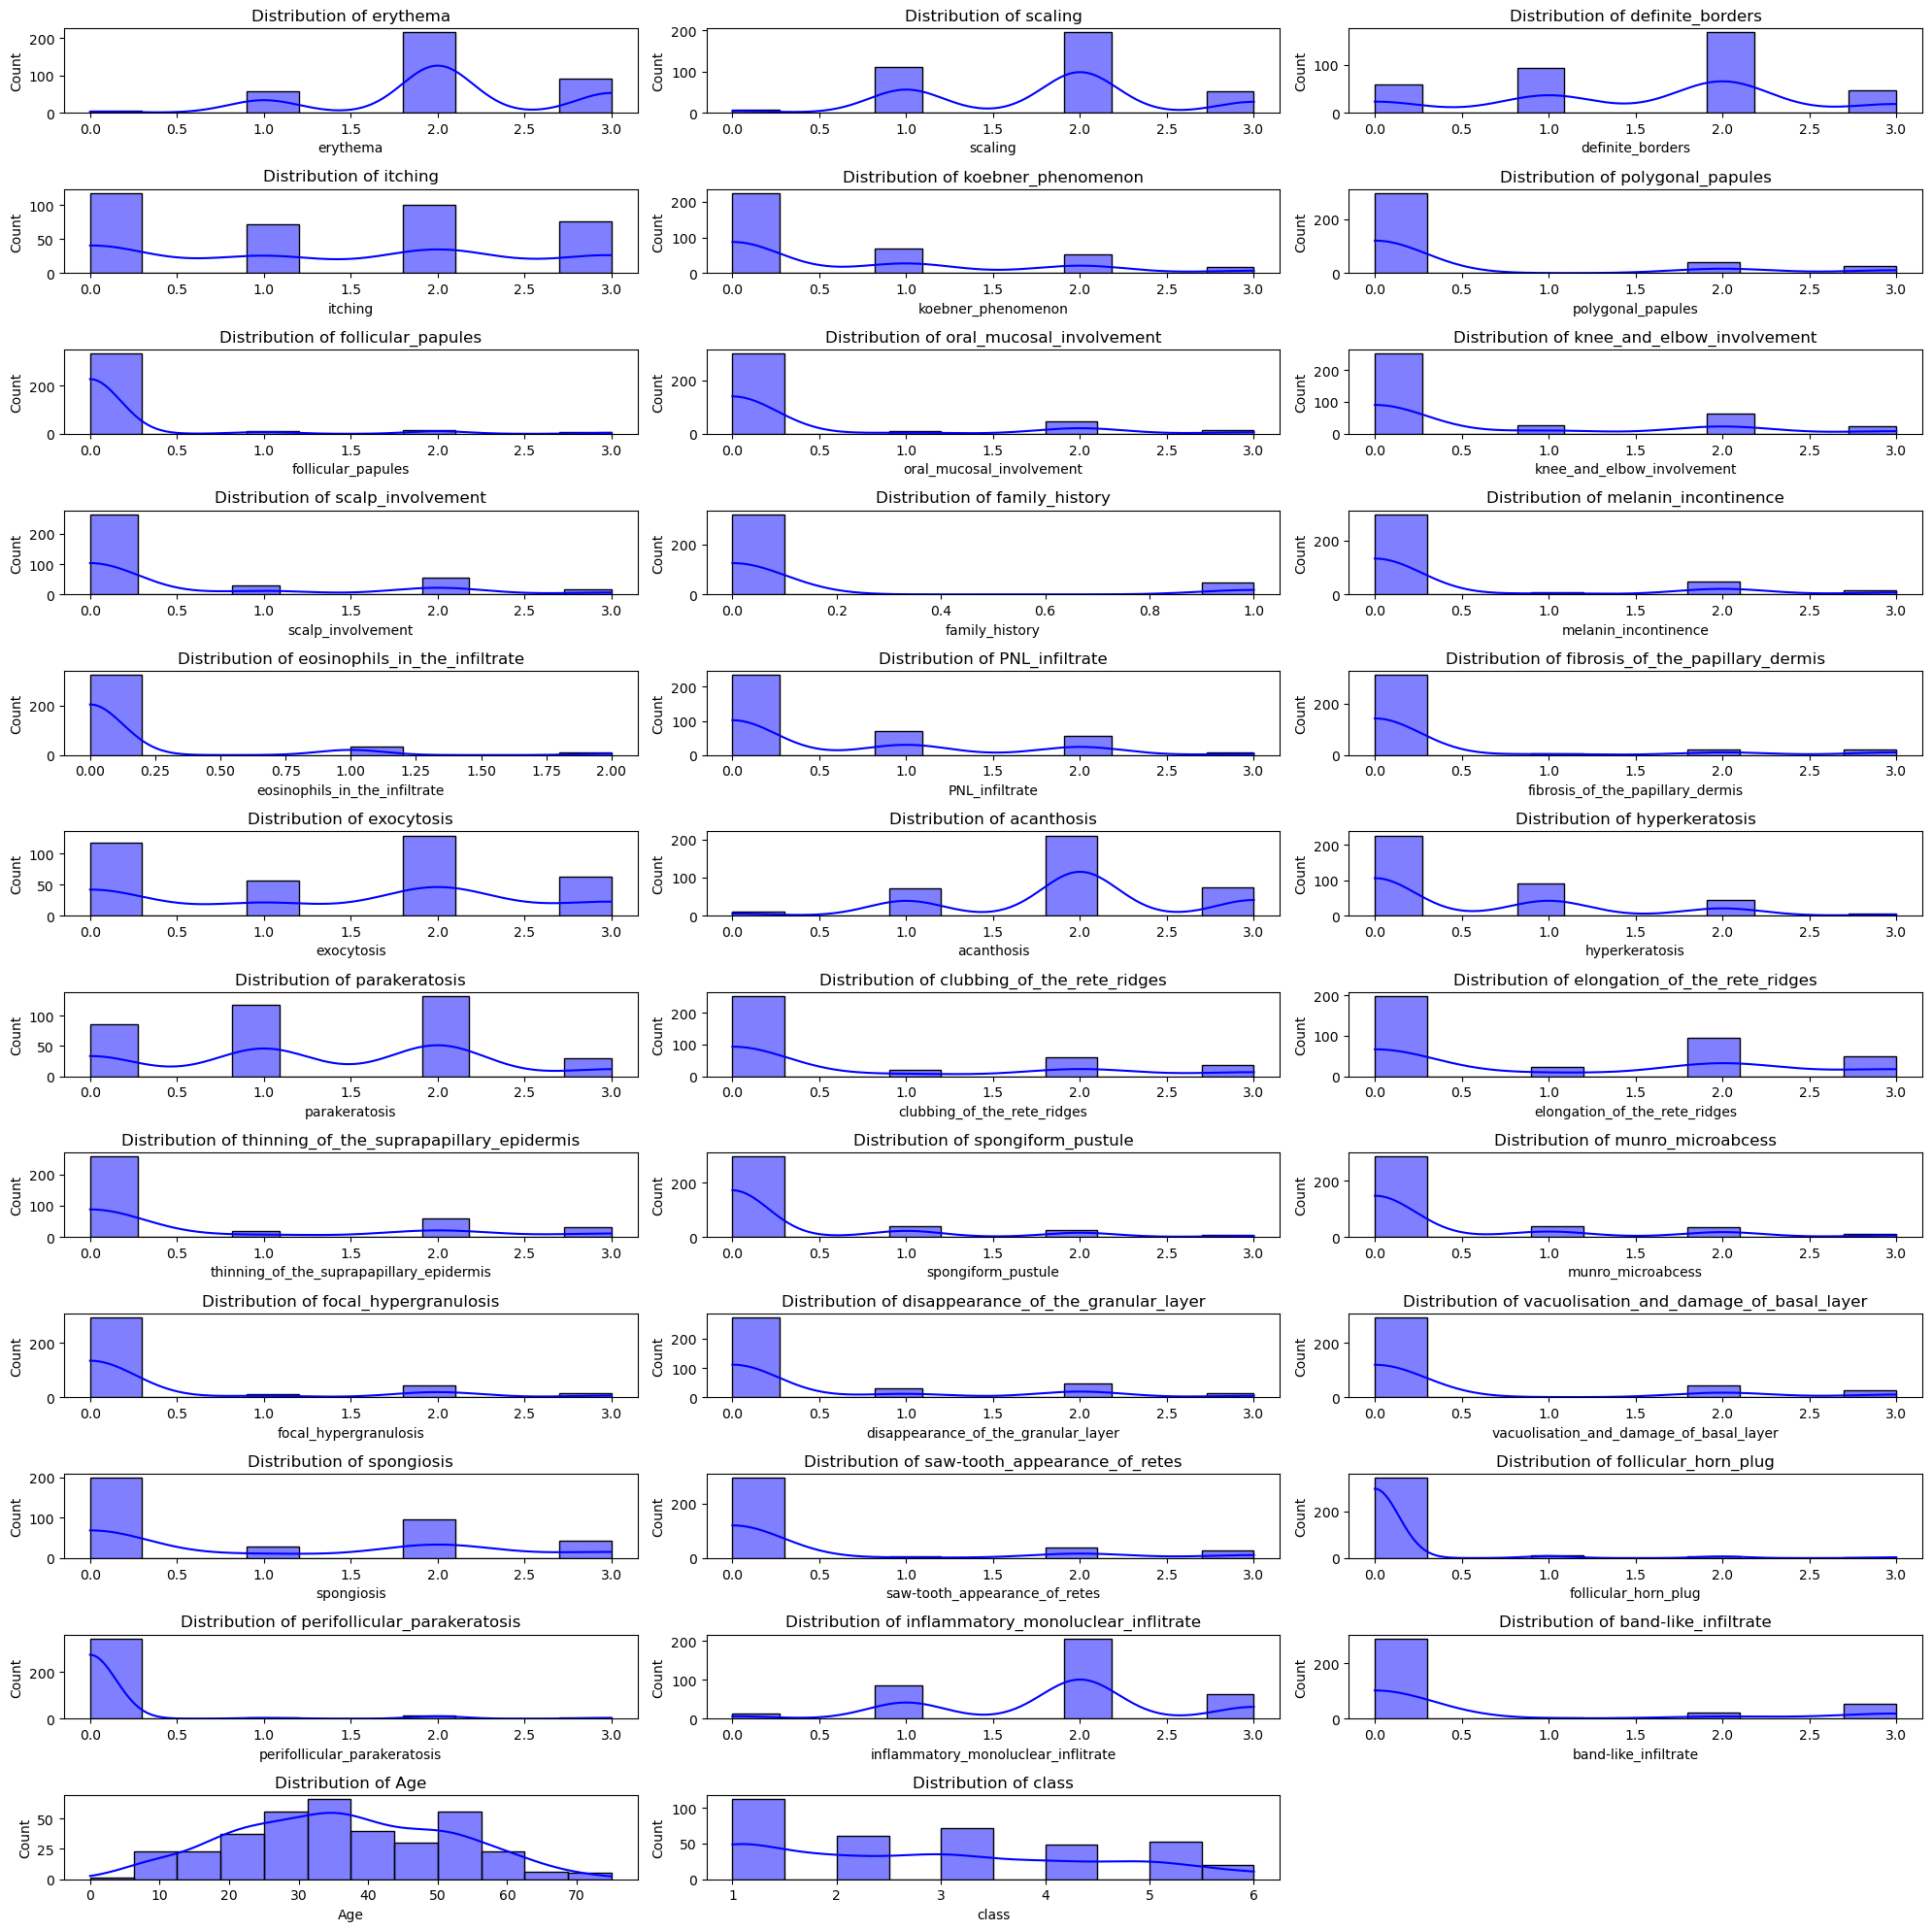

In [66]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots
plt.figure(figsize=(20,20))  # figure size 
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns)//3+1, 3, i + 1)  # 3 plots per row and i+1 is index 
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()  # Adjust spacing between subplots

# Show the plots
plt.show()

 The Age column shows a distribution that is near to bell shape, meaning it resembles a normal distribution but isn't perfectly symmetric.Most of the patients are clustered around 30-40 range
 
 The other attributes show non-bell-shaped distributions(left-skewed,right-skewed)

# CHECKING OUTLIERS

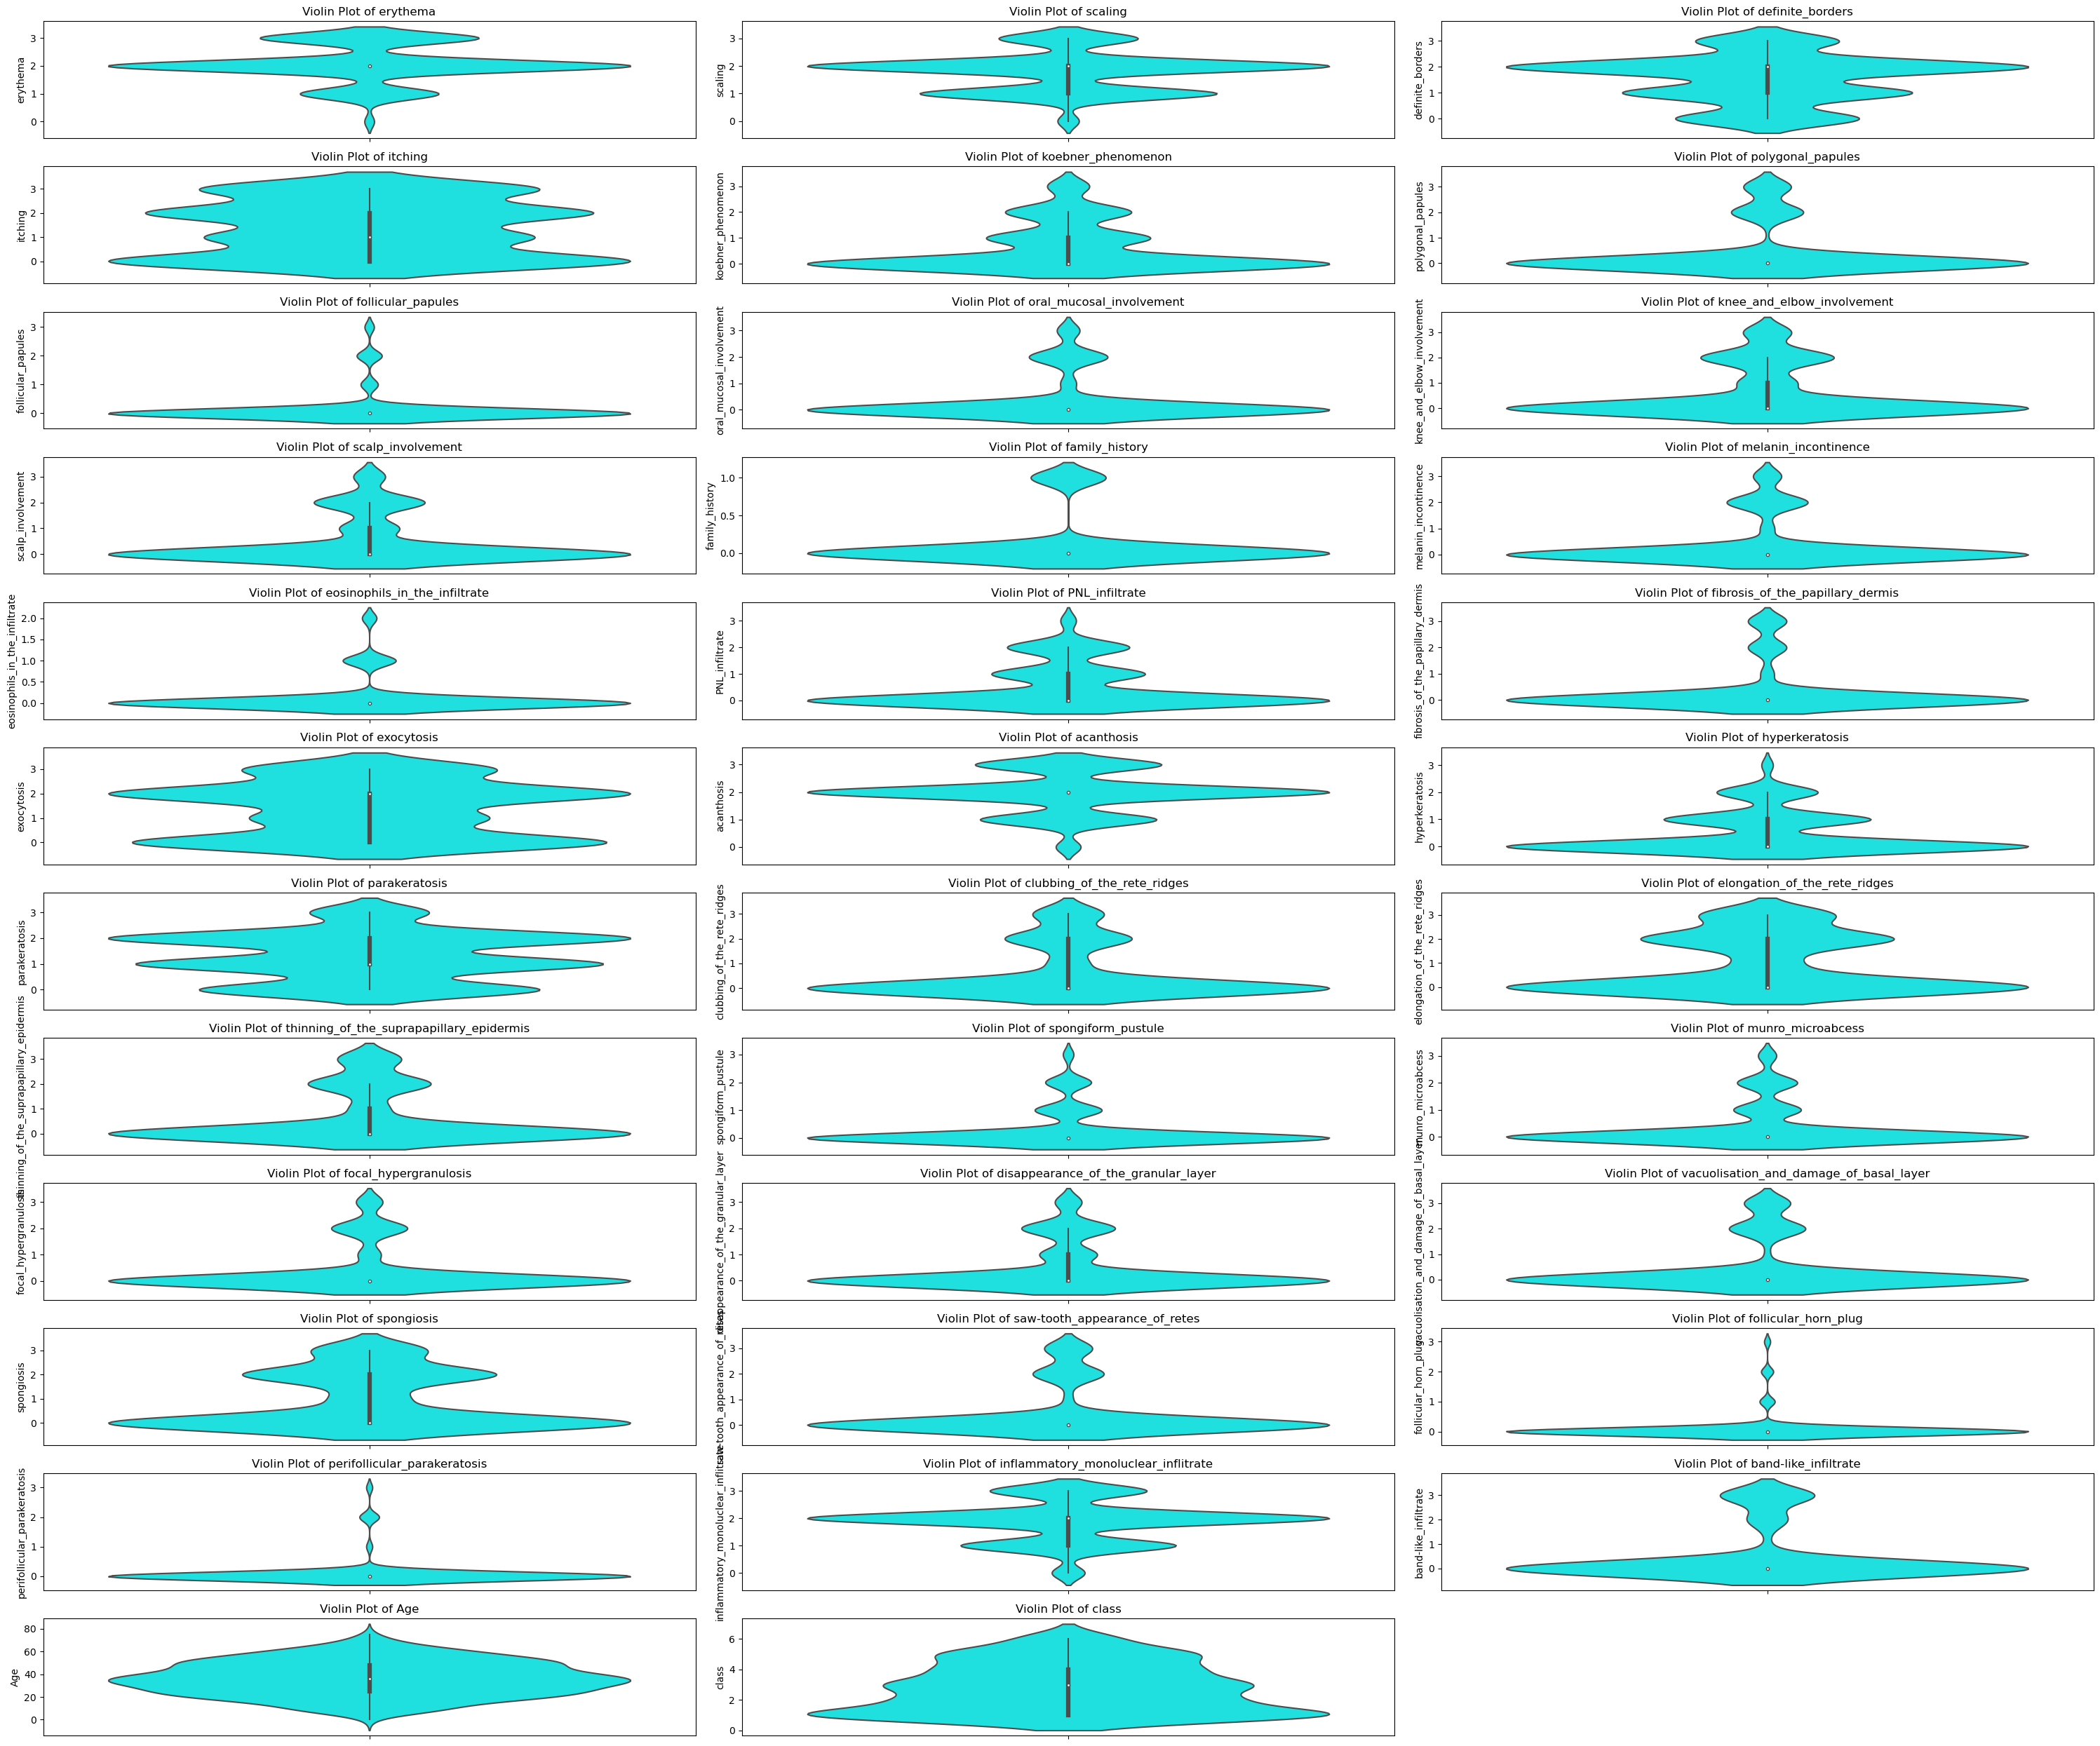

In [67]:
plt.figure(figsize=(30, 25))

# Loop through each numerical column to plot violin plots
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.violinplot(data=df, y=col, color='cyan')
    plt.title(f'Violin Plot of {col}')

plt.tight_layout()
plt.show()



There are some outliers in knee_and_elbow_involvement,melanin_incontience,eosinophils_in_the_infiltrate.

So now we have to remove outliers using IQR method because does not follow normal distribution

In [68]:
columns=df[["knee_and_elbow_involvement","melanin_incontinence","eosinophils_in_the_infiltrate"]]

In [69]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[columns].quantile(0.25)  # 25th percentile
        Q3 = df[columns].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df = df[(df[columns] >= lower_bound) & (df[columns] <= upper_bound)]
    return df

# Apply the function to all numerical columns
for col in numerical_columns:
    df = remove_outliers_iqr(df, col)


### After removing checking outiers

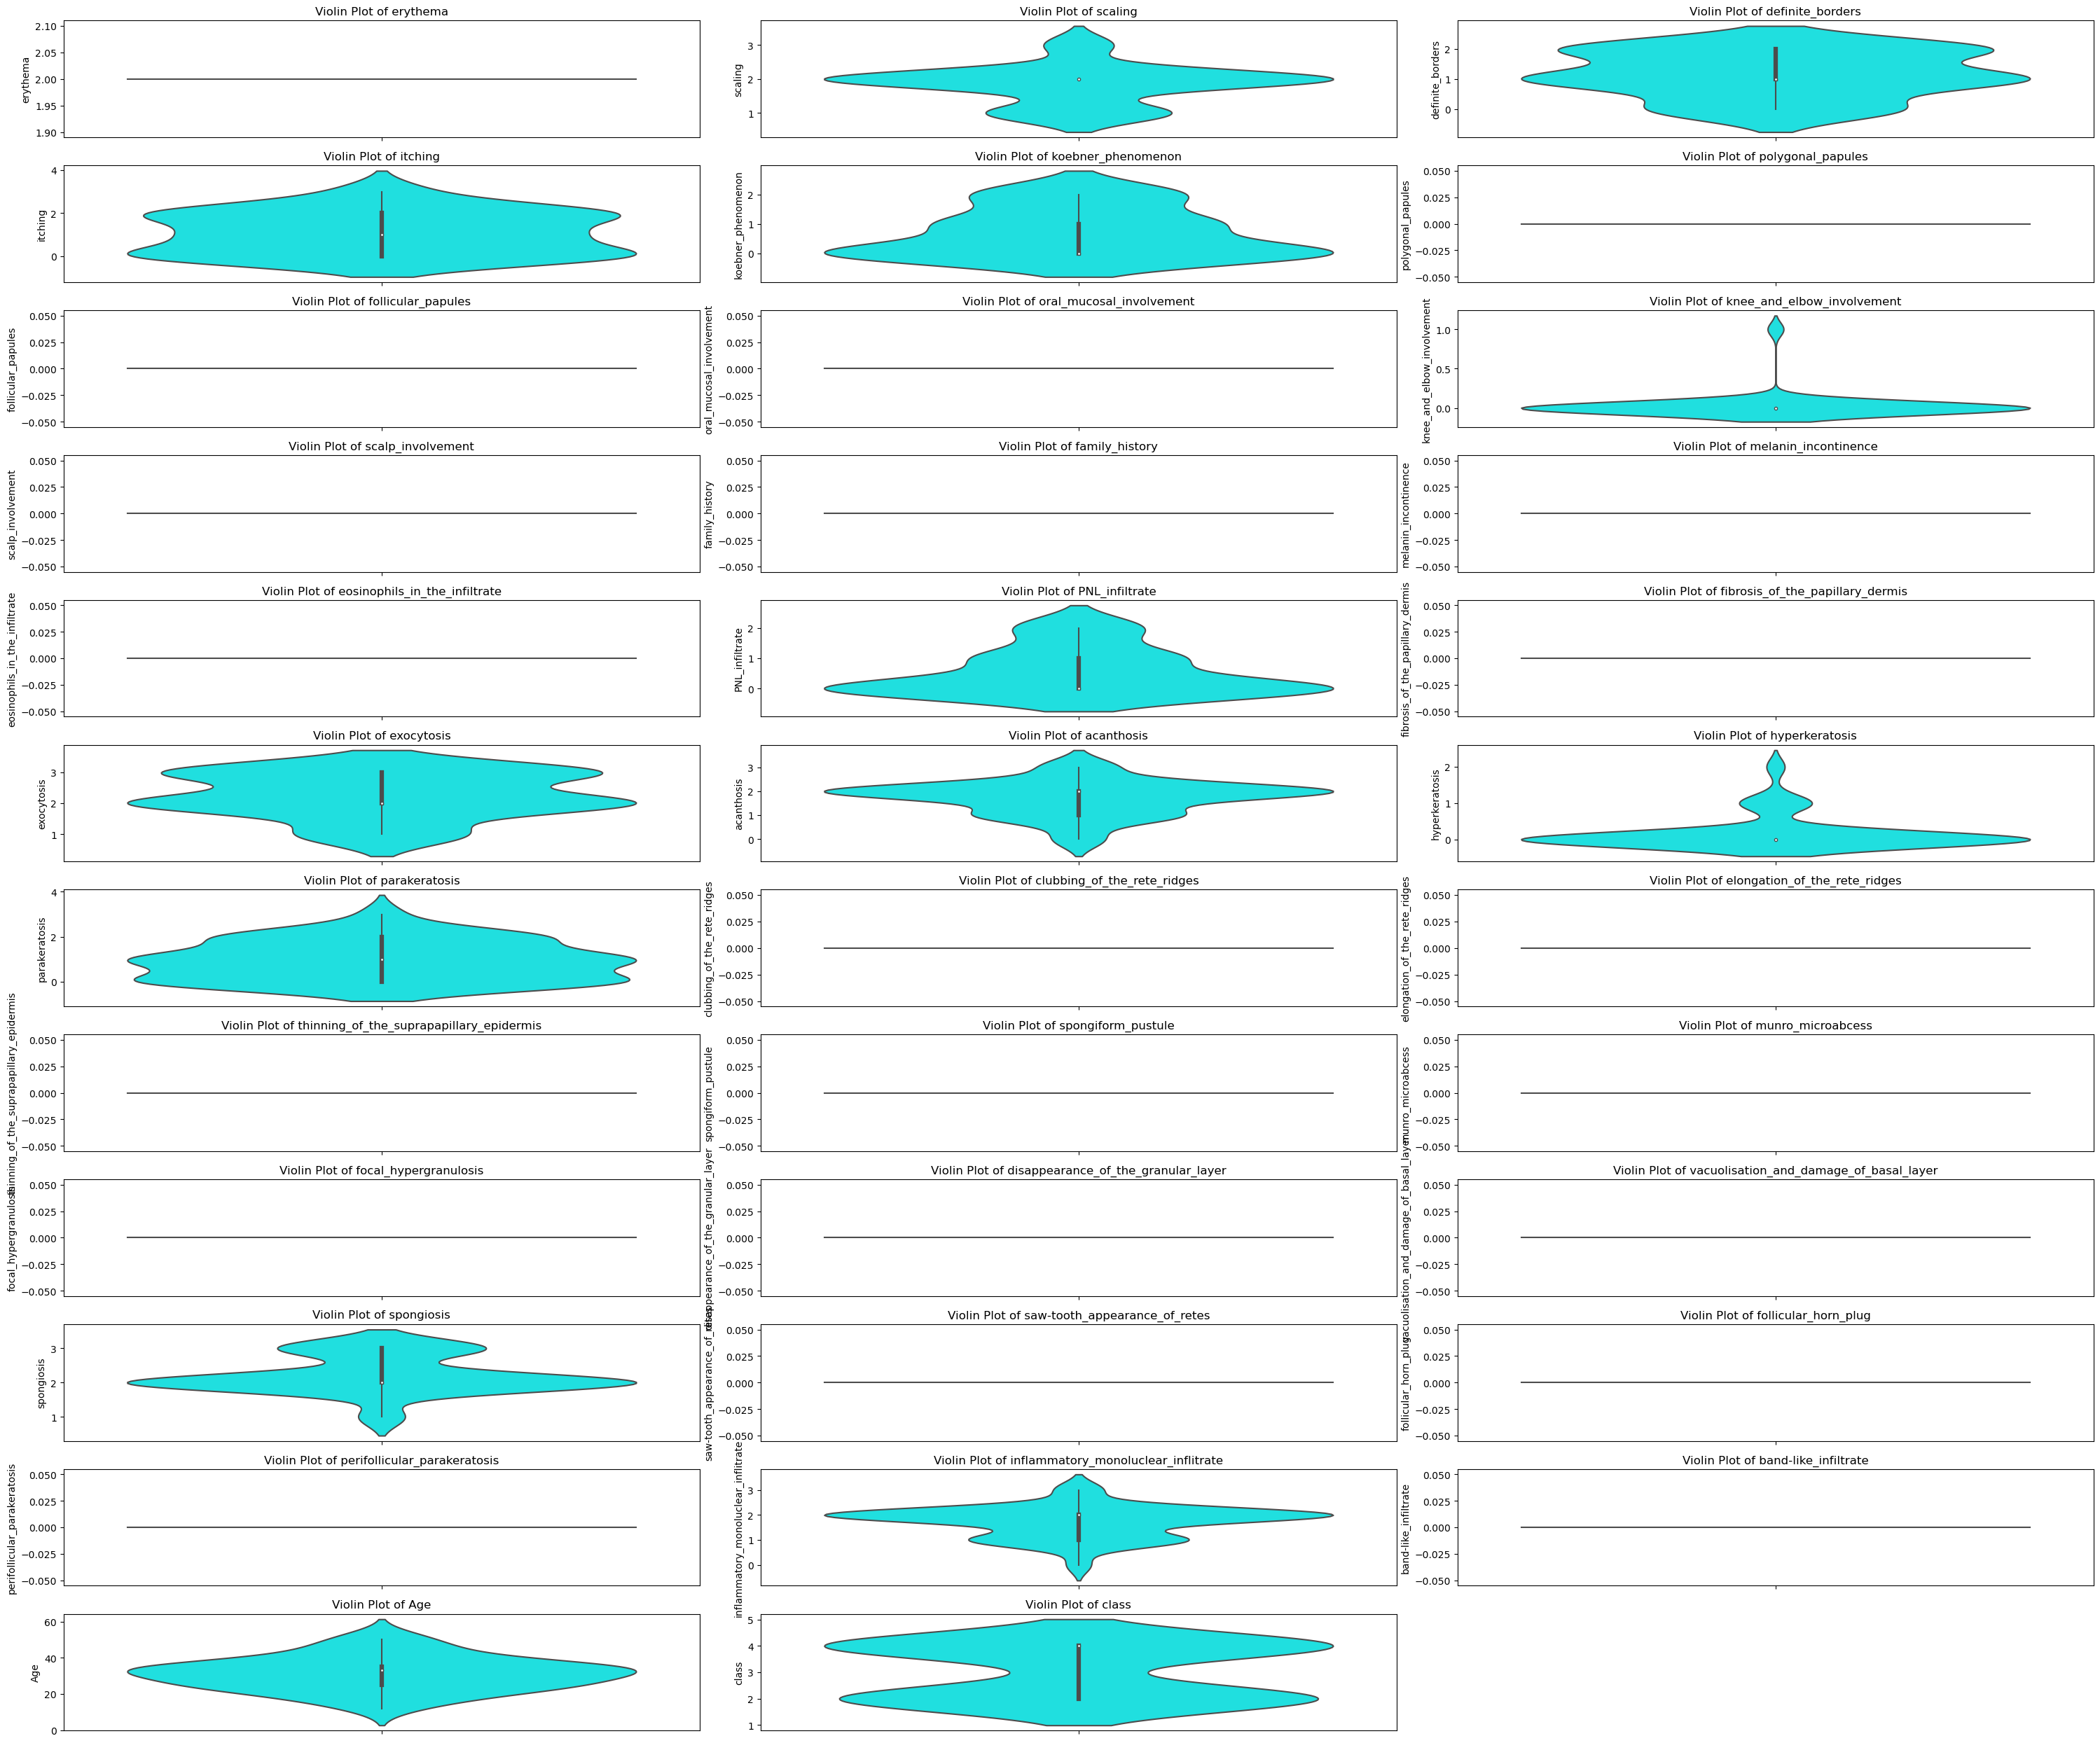

In [70]:
plt.figure(figsize=(30, 25))

# Loop through each numerical column to plot violin plots
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.violinplot(data=df, y=col, color='cyan')
    plt.title(f'Violin Plot of {col}')

plt.tight_layout()
plt.show()


We have observed that outliers are detected using IQR method, now there were no outiers in any column, 

some attributes does not showing plot means the data is constant , all values are in same range soo its hard to visualize

# MODEL CREATION

## Logistic Regression

  In classification problems, especially when dealing with imbalanced datasets, the F1-score is often more important than accuracy

In [71]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = log_reg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")

print("Classification Report:")
print(classification_report(y_test,y_pred_lr))


Logistic Regression Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       0.82      1.00      0.90         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       0.67      0.67      0.67         3

    accuracy                           0.96        74
   macro avg       0.91      0.92      0.91        74
weighted avg       0.96      0.96      0.96        74



In [86]:
print(confusion_matrix(y_test, y_pred_lr))

[[30  0  0  0  0  1]
 [ 0  9  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  1  0  0  0  2]]


In [72]:
f1 = f1_score(y_test, y_pred_lr, average='weighted') 
print(f"F1-Score: {f1:.2f}")

F1-Score: 0.96


## Support vector Classifier

In [73]:
# SVC 
svc_balanced = SVC(kernel='rbf', random_state=42, class_weight='balanced')
svc_balanced.fit(X_train, y_train)

# Predict on the test set
y_pred_balanced = svc_balanced.predict(X_test)

# Check classification report
print(classification_report(y_test, y_pred_balanced))


              precision    recall  f1-score   support

           1       1.00      0.87      0.93        31
           2       0.38      0.56      0.45         9
           3       1.00      1.00      1.00        13
           4       0.27      0.38      0.32         8
           5       1.00      0.60      0.75        10
           6       0.50      0.67      0.57         3

    accuracy                           0.76        74
   macro avg       0.69      0.68      0.67        74
weighted avg       0.83      0.76      0.78        74



In [74]:
print(confusion_matrix(y_test, y_pred_balanced))

[[27  0  0  2  0  2]
 [ 0  5  0  4  0  0]
 [ 0  0 13  0  0  0]
 [ 0  5  0  3  0  0]
 [ 0  3  0  1  6  0]
 [ 0  0  0  1  0  2]]


## Hyper Parameter Tuning for SVC

In [75]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
svc_best = grid_search.best_estimator_
y_pred_best = svc_best.predict(X_test)
print("Classification Report with Best Parameters:")
print(classification_report(y_test, y_pred_best))


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report with Best Parameters:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       0.82      1.00      0.90         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       0.67      0.67      0.67         3

    accuracy                           0.96        74
   macro avg       0.91      0.92      0.91        74
weighted avg       0.96      0.96      0.96        74



In [76]:
f1 = f1_score(y_test, y_pred_best, average='weighted') 
print(f"F1-Score: {f1:.2f}")

F1-Score: 0.96


## Random Forest Classifier

In [77]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42,class_weight='balanced')

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)


In [78]:
## Evaluation of model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Confusion Matrix:
[[31  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  3]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [79]:
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
print(f"F1-Score: {f1:.2f}")

F1-Score: 0.99


* Both models have nearly identical performance in terms of accuracy and F1-score, 
  SVC has the slight advantage here due to the higher accuracy. 
  However, Random Forest tends to perform better on unbalanced datasets and can capture complex relationships. 
  
  Since both models are performing excellently, 
  SVC can be a good choice for a slightly more accurate and possibly more efficient model in terms of training time.
  
 So Selecting SVC is best model and making prediction on SVC model

## Predictions

In [80]:
y_pred_rf = rf_classifier.predict(X_test)

# Display the predictions
print("Predictions on Test Set:\n", y_pred_rf)

# Classification report to evaluate the model's performance
print("\n\n\n")

print("Classification Report for SVC Model:")
print(classification_report(y_test, y_pred_rf))


Predictions on Test Set:
 [1 1 4 1 3 1 2 1 1 6 3 1 1 1 2 3 2 1 1 5 4 1 3 3 1 2 4 1 1 4 1 3 1 5 3 3 1
 5 6 4 1 2 1 5 1 1 2 2 2 3 1 6 1 5 1 5 1 1 2 1 1 3 3 4 5 5 5 1 5 2 3 3 4 1]




Classification Report for SVC Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



## FINAL DECISION

1.  Random Forest CLassifier is selected as best model  achieved the highest performance with an accuracy of 99% and an F1-Score of 0.99.
2. SVC performed well with both accuracy and F1-Score at 96%

## Model Saving

In [81]:
import pickle
file=open("rf_classifier.pkl","wb")
pickle.dump(rf_classifier,file)

# 📝 Model Comparison Report

## 📋 Objective:
To compare the performance of multiple machine learning models on the given classification dataset and recommend the best model for deployment in production.

---

## 📊 Dataset Overview:
- **Number of Classes:** 6
- **Training Data Distribution:**
  - Class 1: 81 samples
  - Class 2: 52 samples
  - Class 3: 59 samples
  - Class 4: 41 samples
  - Class 5: 42 samples
  - Class 6: 17 samples

- **Testing Data Distribution:**
  - Class 1: 31 samples
  - Class 2: 9 samples
  - Class 3: 13 samples
  - Class 4: 8 samples
  - Class 5: 10 samples
  - Class 6: 3 samples

The dataset is **imbalanced**, requiring special handling to ensure fair model performance across all classes.

---

## 🧪 Models Evaluated:
1. **Random Forest Classifier**
2. **Support Vector Classifier (SVC)**
3. **Logistic Regression**

### **Evaluation Metrics:**
- **Accuracy**: Measures the percentage of correct predictions.
- **F1-Score**: A balanced measure of precision and recall, especially important for imbalanced datasets.

---

## 📈 Model Performance:

| Model                | Accuracy | F1-Score |
|----------------------|----------|----------|
| Random Forest        | 99%      | 0.99     |
| Support Vector Classifier (SVC) | 96%      | 0.96     |
| Logistic Regression  | 96%      | 0.96     |

---

## 🔍 Key Observations:
1. **Random Forest** achieved the highest performance with an **accuracy of 99%** and an **F1-Score of 0.99**.
2. **SVC** performed well with both **accuracy and F1-Score at 96%**.
3. **Logistic Regression** also achieved **96% accuracy and F1-Score**, making it comparable to SVC.

---

## ✅ Recommendation:
### 🏆 **Best Model for Production: Random Forest Classifier**
- **Reason:**
  - Achieved the highest accuracy and F1-Score.
  - Handles class imbalance effectively.
  - Performs consistently across all classes.

--





# 📝 Simple Tips for Doctors to Detect Skin Diseases Early

## ✅ 1. Pay Close Attention to Patient History

Ask patients about any changes in their skin, such as new spots, rashes, or persistent itching.

Check for family history of skin diseases, which can increase the likelihood of certain conditions.

## ✅ 2. Examine the Skin Thoroughly

Inspect the entire body, including hidden areas like the scalp, between toes, and under nails.

Use a dermatoscope for a closer look at suspicious moles or lesions.

## ✅ 3. Look for Early Warning Signs

Color changes: Redness, darkening, or discoloration.

Shape and size changes: Rapidly growing moles or lesions.

Texture changes: Rough, scaly, or crusty patches.

Non-healing wounds: Ulcers or sores that do not heal.

## ✅ 4. Educate Patients on Skin Self-Exams

Encourage patients to perform regular self-examinations.

Teach them the "ABCDE" rule for identifying potentially dangerous moles:

A - Asymmetry

B - Border irregularity

C - Color variation

D - Diameter greater than 6mm

E - Evolving shape or size

## ✅ 5. Stay Updated on Common Skin Conditions

Familiarize yourself with common skin diseases like eczema, psoriasis, and skin cancer.

Keep up-to-date with the latest dermatology guidelines and treatments.

## ✅ 6. Use Technology for Early Detection

Utilize AI-powered skin analysis tools to assist in diagnosing skin conditions.

Digital dermoscopy can help track changes in moles over time.

## ✅ 7. Refer to a Specialist When Needed

If unsure about a diagnosis, refer the patient to a dermatologist.

Early referrals can prevent serious conditions from worsening.

## ✅ 8. Promote Sun Protection and Skin Care

Advise patients to use sunscreen to reduce the risk of skin cancer.

Encourage healthy skincare habits to prevent infections and inflammation.

